# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang digunakan pada penelitian ini berasal dari Kaggle dan berisi data klinis pasien yang berkaitan dengan faktor risiko diabetes. Dataset ini mencakup sejumlah variabel, yaitu patient_number, cholesterol, glucose, hdl_chol, chol_hdl_ratio, age, gender, height, weight, bmi, systolic_bp, diastolic_bp, waist, hip, waist_hip_ratio, serta variabel target diabetes. Variabel-variabel tersebut merepresentasikan karakteristik demografis, antropometri, serta indikator kesehatan yang digunakan untuk menganalisis dan memprediksi kondisi diabetes pada pasien.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [77]:
#Type your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from google.colab import files

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [78]:
!wget https://raw.githubusercontent.com/sahrul3114/Eksperimen_SML_Syahrul-Akbar-Ramdhani/main/diabetes.csv

--2025-12-20 10:01:20--  https://raw.githubusercontent.com/sahrul3114/Eksperimen_SML_Syahrul-Akbar-Ramdhani/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29372 (29K) [text/plain]
Saving to: ‘diabetes.csv.4’

diabetes.csv.4      100%[===================>]  28.68K  --.-KB/s    in 0.003s  

2025-12-20 10:01:20 (8.16 MB/s) - ‘diabetes.csv.4’ saved [29372/29372]



In [79]:
#Type your code here
df = pd.read_csv('diabetes.csv')
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [80]:
#Type your code here
df.shape

(390, 16)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


Dilihat dari df.info() bahwa tidak ada missing value, tapi ada masalah pada tipe variabel, sepertin 'chol_hdl_ratio', bmi', 'waist_hip_ratio' harusnya berupa float malah jadi object

In [82]:
cols_to_float = ['chol_hdl_ratio', 'bmi', 'waist_hip_ratio']

for col in cols_to_float:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .str.strip()
        )
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [83]:
df.describe()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385
std,112.727548,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212
min,1.000000,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000
25%,98.250000,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000
50%,195.500000,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000
75%,292.750000,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000
max,390.000000,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000


Hasil statistik deskriptif menunjukkan bahwa dataset terdiri dari 390 pasien tanpa nilai hilang. Beberapa variabel seperti kadar glukosa darah, indeks massa tubuh (BMI), dan tekanan darah menunjukkan sebaran yang tidak normal dengan nilai ekstrem. Namun, nilai-nilai tersebut mencerminkan kondisi klinis nyata pada pasien diabetes sehingga tidak dilakukan penghapusan outlier. Variabel cholesterol–HDL ratio dan waist–hip ratio menunjukkan variasi yang cukup besar dan relevan sebagai indikator risiko metabolik.

In [84]:
kategori_col = ['gender', 'diabetes']
df[kategori_col].value_counts()

,,count
gender,diabetes,
female,No diabetes,194
male,No diabetes,136
female,Diabetes,34
male,Diabetes,26


In [85]:
df.duplicated().sum()

np.int64(0)

tidak ada data duplikat

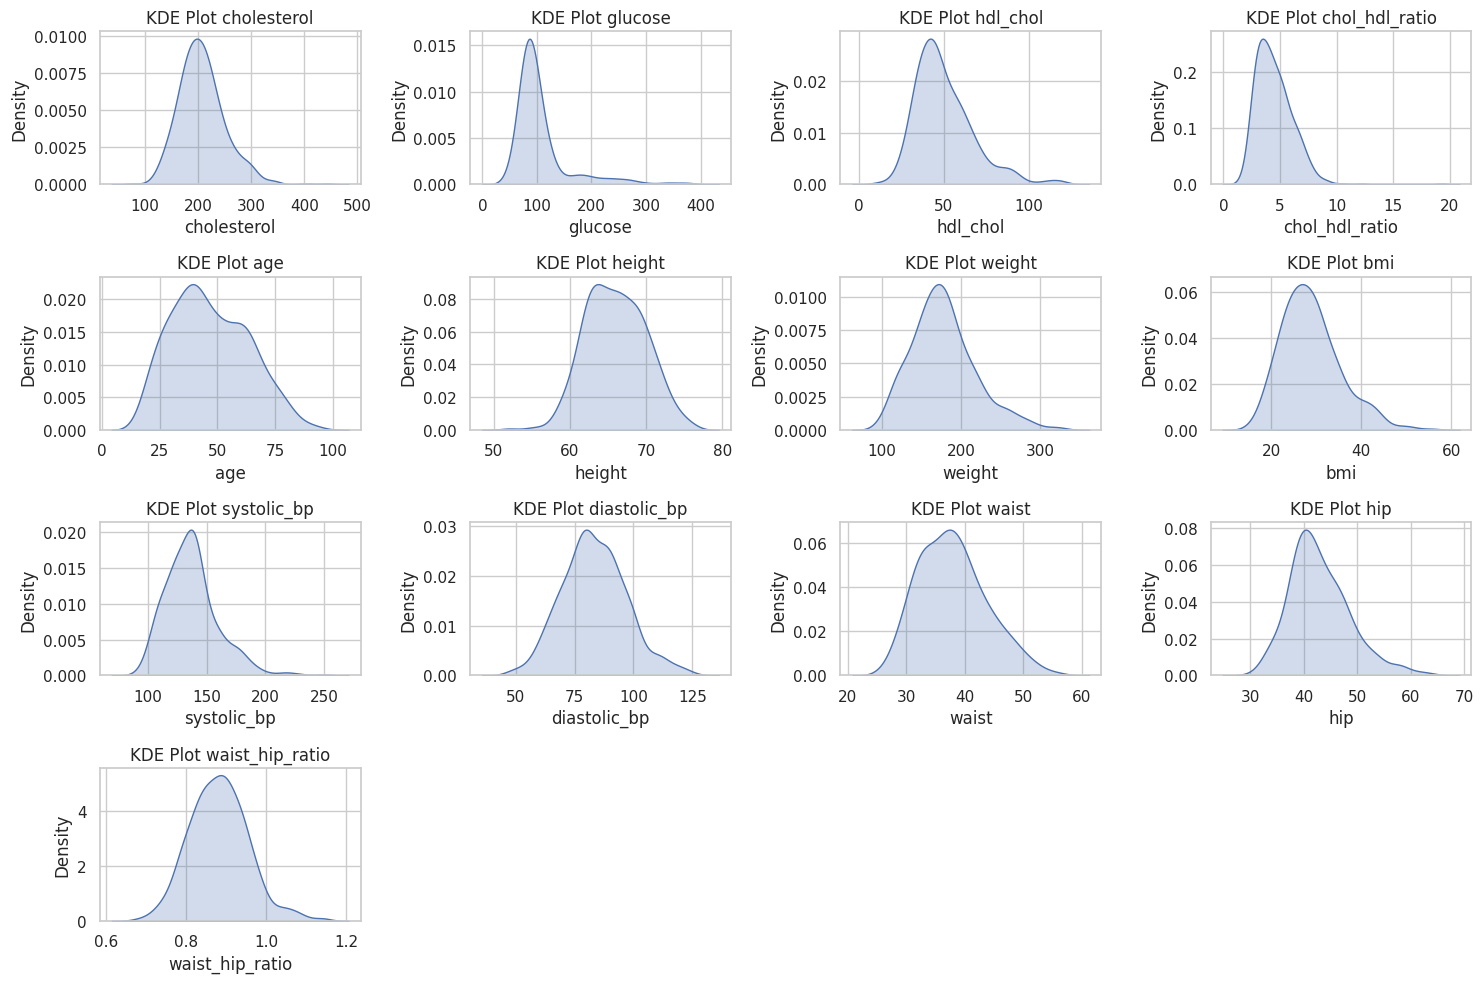

In [86]:
num_cols = [
    'cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio',
    'age', 'height', 'weight', 'bmi',
    'systolic_bp', 'diastolic_bp',
    'waist', 'hip', 'waist_hip_ratio'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'KDE Plot {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

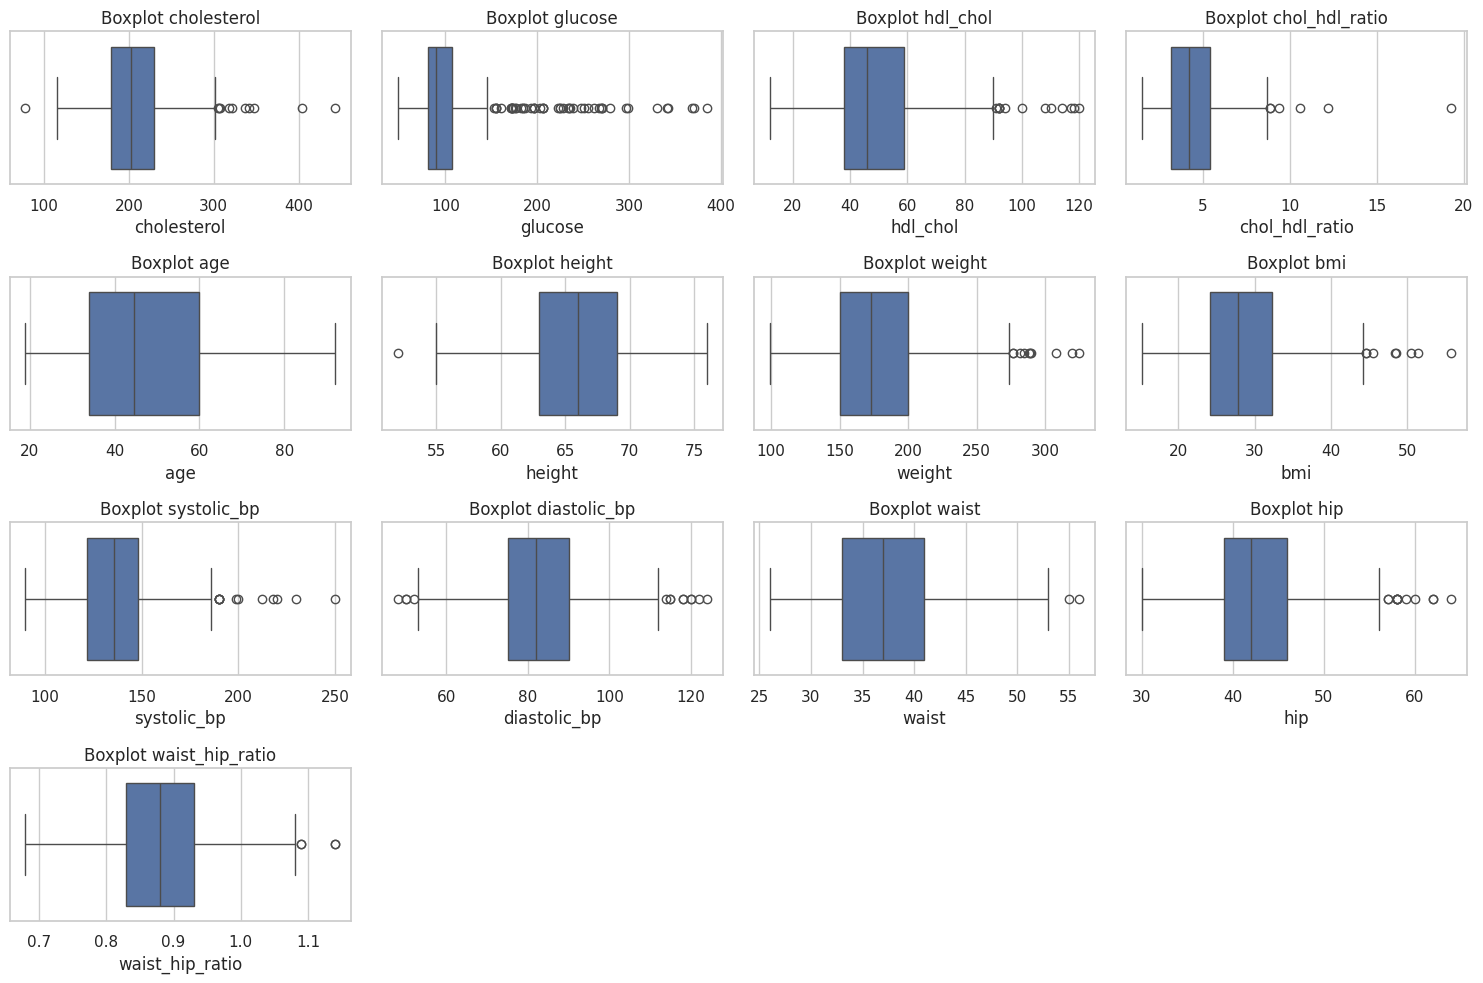

In [87]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

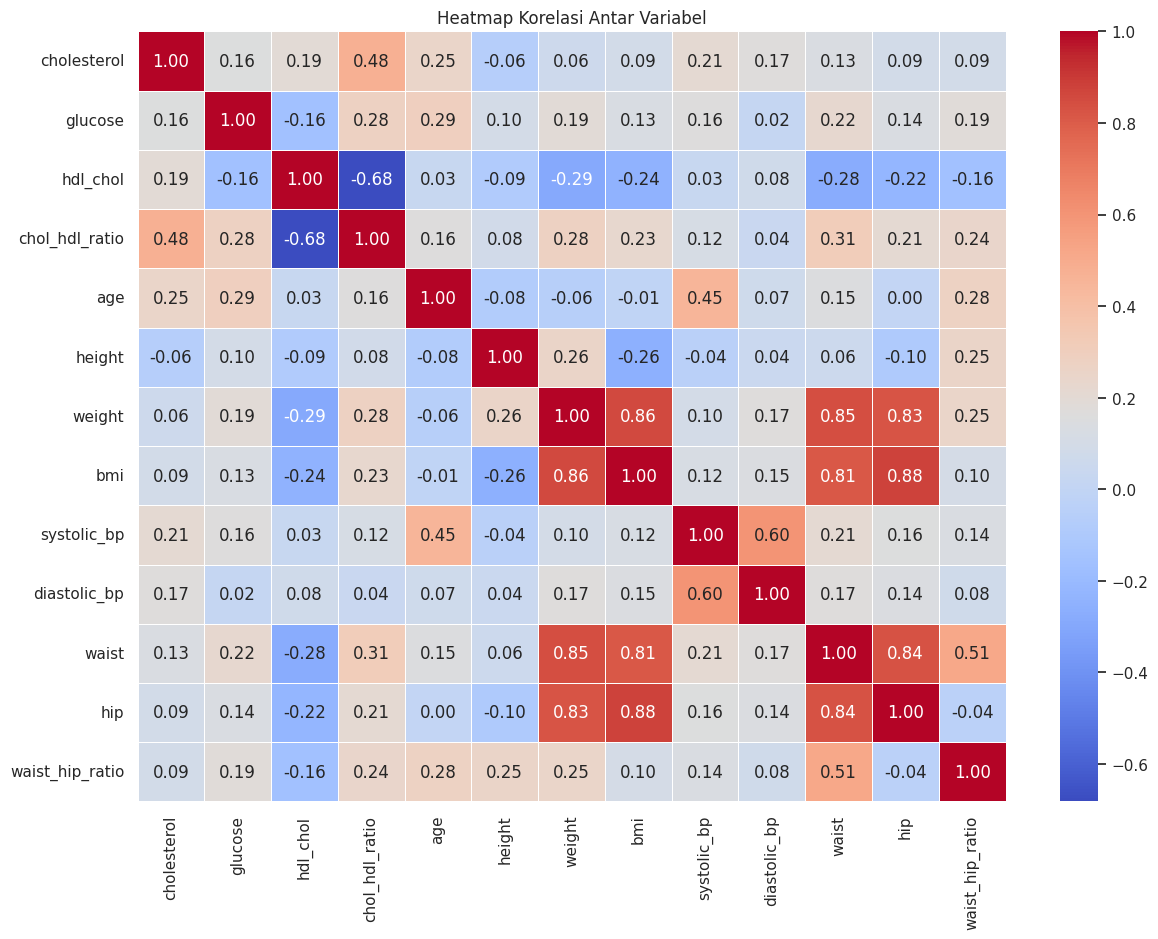

In [88]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

Analisis korelasi menunjukkan adanya hubungan yang tinggi antar beberapa variabel tertentu, sehingga berpotensi menyebabkan multikolinearitas pada proses pemodelan. Oleh karena itu, seleksi fitur dilakukan secara terbatas pada kelompok variabel yang memiliki korelasi tinggi dengan memilih satu variabel yang paling representatif dari setiap kelompok tersebut, yaitu BMI, chol_hdl_ratio, systolic_bp, dan waist_hip_ratio. Sementara itu, variabel lain yang tidak menunjukkan korelasi tinggi tetap digunakan dalam pemodelan karena dinilai memberikan informasi tambahan yang relevan.

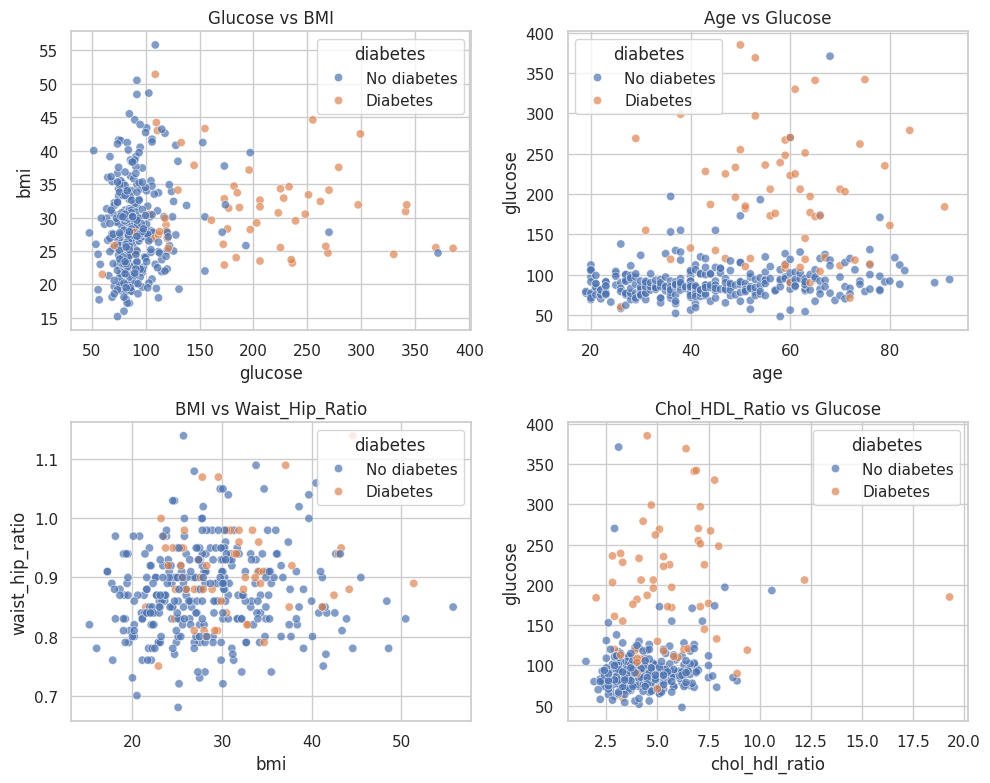

In [89]:
# Style biar rapi
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))

# 1. Glucose vs BMI
plt.subplot(2, 2, 1)
sns.scatterplot(
    x='glucose', y='bmi',
    hue='diabetes',
    data=df,
    alpha=0.7
)
plt.title('Glucose vs BMI')

# 2. Age vs Glucose
plt.subplot(2, 2, 2)
sns.scatterplot(
    x='age', y='glucose',
    hue='diabetes',
    data=df,
    alpha=0.7
)
plt.title('Age vs Glucose')

# 3. BMI vs Waist-Hip Ratio
plt.subplot(2, 2, 3)
sns.scatterplot(
    x='bmi', y='waist_hip_ratio',
    hue='diabetes',
    data=df,
    alpha=0.7
)
plt.title('BMI vs Waist_Hip_Ratio')

# 4. Chol-HDL Ratio vs Glucose
plt.subplot(2, 2, 4)
sns.scatterplot(
    x='chol_hdl_ratio', y='glucose',
    hue='diabetes',
    data=df,
    alpha=0.7
)
plt.title('Chol_HDL_Ratio vs Glucose')

plt.tight_layout()
plt.show()

Visualisasi scatter plot menunjukkan bahwa pasien diabetes cenderung memiliki kadar glukosa darah yang lebih tinggi disertai dengan nilai BMI, waist–hip ratio, dan cholesterol–HDL ratio yang lebih besar dibandingkan pasien non-diabetes. Meskipun terdapat tumpang tindih antar kelas, pola sebaran data mengindikasikan bahwa variabel-variabel tersebut memiliki daya diskriminatif yang baik dan relevan untuk digunakan dalam pemodelan prediksi diabetes.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [90]:
# preprocessing.py
df_clean = (df.drop(columns=['patient_number','weight', 'height',
                             'waist', 'hip', 'hdl_chol','diastolic_bp']))

In [91]:
kolom_numerik = df_clean.select_dtypes(include=['int64', 'float64']).columns

In [92]:
df_clean[kolom_numerik]

,cholesterol,glucose,chol_hdl_ratio,age,bmi,systolic_bp,waist_hip_ratio
0,193,77,3.9,19,22.5,118,0.84
1,146,79,3.6,19,26.4,108,0.83
2,217,75,4.0,20,29.3,110,0.89
3,226,97,3.2,20,19.6,122,0.79
4,164,91,2.4,20,20.2,122,0.82
...,...,...,...,...,...,...,...
385,227,105,5.2,83,25.2,150,0.88
386,226,279,4.3,84,37.5,144,0.85
387,301,90,2.6,89,21.7,218,0.76
388,232,184,2.0,91,24.0,170,0.92


In [93]:
# Scaling
scaler = RobustScaler()
scaler.fit_transform(df_clean[kolom_numerik])

array([[-0.2       , -0.48598131, -0.13636364, ..., -0.64831804,
        -0.69230769, -0.4       ],
       [-1.14      , -0.41121495, -0.27272727, ..., -0.17125382,
        -1.07692308, -0.5       ],
       [ 0.28      , -0.56074766, -0.09090909, ...,  0.18348624,
        -1.        ,  0.1       ],
       ...,
       [ 1.96      ,  0.        , -0.72727273, ..., -0.74617737,
         3.15384615, -1.2       ],
       [ 0.58      ,  3.51401869, -1.        , ..., -0.4648318 ,
         1.30769231,  0.4       ],
       [-0.76      ,  0.14953271, -0.81818182, ...,  1.45565749,
         0.92307692,  1.2       ]])

In [94]:
# Encoding/Mapping
df_clean['gender'] = df_clean['gender'].map({'male': 1, 'female': 0})
df_clean['diabetes'] = df_clean['diabetes'].map({'No diabetes': 0, 'Diabetes': 1})

In [95]:
df_clean.isnull().sum()

,0
cholesterol,0
glucose,0
chol_hdl_ratio,0
age,0
gender,0
bmi,0
systolic_bp,0
waist_hip_ratio,0
diabetes,0


In [96]:
# save hasil preprocessing
df_clean.to_csv("diabetes_preprocessed.csv", index=False)